The following is based on the researched described in the paper "Predicting COVID-19 cases using Bidirectional LSTM on multivariate time series" by Ben Said et al.

In order to train our model on a richer dataset, we cluster countries based on several demographic, socioeconomic and health sector indicators to locate similar countries. Thus, in our case, instead of only training on Canada's data, we will then train on the data belonging to all countries in Canada's cluster. The assumption is that similar countries will have comparable COVID-19 spread hypothesis functions.

We use the following indicators to cluster countries, collected from ourworldindata.org, a database collected by researchers at the University of Oxford:

*   Median age per country.
*   Percentage of population aged 65 and 70 years or older.
*   Country population and density.
*   GDP per capita.
*   Number of hospital beds per thousand.
*   Cardiovascular death rate
*   Diabetes prevelance



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('./covid-data.csv', usecols=[
    'iso_code',
    'location',
    'median_age',
    'aged_65_older',
    'aged_70_older',
    'population',
    'population_density',
    'gdp_per_capita',
    'hospital_beds_per_thousand',
    'diabetes_prevalence'
])
df = df.dropna()

cols = [
    'median_age',
    'aged_65_older',
    'aged_70_older',
    'population',
    'population_density',
    'gdp_per_capita',
    'hospital_beds_per_thousand',
    'diabetes_prevalence'
]

data = []
countries = df['location'].unique()
for country in countries:
    data.append(df[df['location'] == country].iloc[0][cols])

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

Now we use this data to perform K-Means clustering, and we use the Elbow method to determine the optimal number of clusters for which the obtained partition is compact.

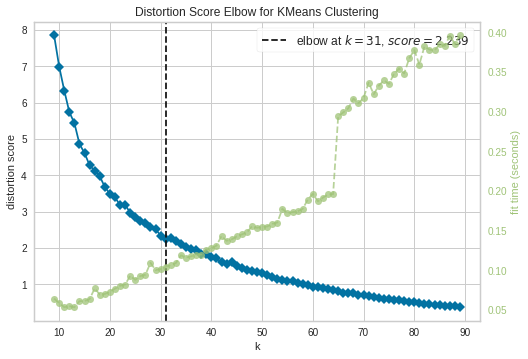

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model=model, k=(9,90), metric='distortion')

visualizer.fit(dataset)
visualizer.show()

In [13]:
# Compute K-Means for the 31 clusters, which according to the above results
# is the optimal number of clusters
kmeans = KMeans(n_clusters=31)
kmeans.fit(dataset)

labels = np.array(kmeans.labels_)
canada_index = np.where(countries == 'Canada')[0][0]
canada_cluster_label = labels[canada_index]
canada_cluster_indices = np.where(labels == canada_cluster_label)
print(countries[canada_cluster_indices])

['Australia' 'Canada' 'Cyprus' 'Iceland' 'New Zealand' 'United States']


Here we see performing KMeans clustering with 14 clusters results in the above cluster for Canada. We can now use data from these countries to train our model.